# Deep Learning Image Classifier Example Notebook

This notebook helps in understanding how to use an Image Classifier model from AI starter library. This notebook is built on example of "Dog" and "Cat" image data set. A link is provided for the [Kaggle Cats & Dogs Data Set](https://www.microsoft.com/en-us/download/details.aspx?id=54765) <br> You can upload your image data set ZIP file into drive using the upload option on the left of colab notebook with "folder" icon.

In [ ]:
#Install the DXC_Industrialized-AI-Starter Package.

!pip install DXC-Industrialized-AI-Starter

#or

!pip install git+https://github.com/dxc-technology/DXC-Industrialized-AI-Starter.git

In [ ]:
from dxc import ai

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported f

Using older than supported version of lightgbm, please upgrade to version greater than 2.2.1


In [ ]:
#Mount your google drive to access the files are folders inside.

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Use this command to verify whether your datset is present in drive.

!ls "/content/drive/My Drive/Colab Notebooks"

In [ ]:
#This piece of code will unzip your dataset and will store under tmp path 
#Modify local_zip path according to your dataset

import os
import zipfile

local_zip = "/content/drive/My Drive/Colab Notebooks/PetImages.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
#Define folder path of your image data set in tmp path

DATADIR = '/tmp/PetImages'

#Define folder of different categories available in data set

CATEGORIES = ['Dog', 'Cat']

### create_training_data function

This function reads each folder and each image from the path provided and will convert image to an array. This function will also resize your image to the size provided, default it will be 100. 

In [ ]:
#Create training(features,labels) data from images path provided
#Pass CATEGORIES,DATADIR defined above
#Pass IMG_SIZE for resize(default=100)
#Function returns training data which will be shuffled internally

features,labels = ai.create_training_data(CATEGORIES,DATADIR, IMG_SIZE = 100 )

### split_normalize_data function

This function split your training data into train and test based on the size of test provided. Default test size will be 0.20. Along with splitting the data to train and test, this function will also normalizes the data.

In [ ]:
#Split data into train and test
#Pass TEST_SIZE for test data size(default = 0.20), X(features), Y(labels), Category_count(number of categories)
#Pass IMG_SIZE for resize(default=100)
#Normalize feature data
#Return of this function will be x_train, x_test, y_train, y_test
#Return y_train, y_test (labels) will be binary matrix

x_train, x_test, y_train, y_test = ai.split_normalize_data(X = features, Y = labels, TEST_SIZE = 0.20,category_count = 2,IMG_SIZE=100)

### image_classifier function

This function compiles the model with the image size and number of categories provided. 

In [ ]:
#This function add the input, hidden and output layers and compiles the model

clf = ai.image_classifier(IMG_SIZE = 100,category_count = 2)

In [ ]:
#fit the model with train data. Use can modify the epochs as required

clf.fit(x_train,y_train,epochs=3)

Epoch 1/3
624/624 [==============================] - 281s 450ms/step - loss: 0.6088 - accuracy: 0.6607
Epoch 2/3
624/624 [==============================] - 280s 448ms/step - loss: 0.4959 - accuracy: 0.7633
Epoch 3/3
624/624 [==============================] - 282s 452ms/step - loss: 0.4403 - accuracy: 0.7956


In [ ]:
#Once the model is trained in above step, pass the test data for prediction

model_predictions = clf.predict(x_test)

In [ ]:
#This piece of code will help to verify the predicted images. 
#Change value of "test_sample" for each image in test data. 
#Note test_sample should be within shape of test data.

import numpy as np
test_sample =0
print(np.argmax(model_predictions[test_sample]))
z = np.argmax(model_predictions[test_sample])
CATEGORIES[z]

1


'Cat'

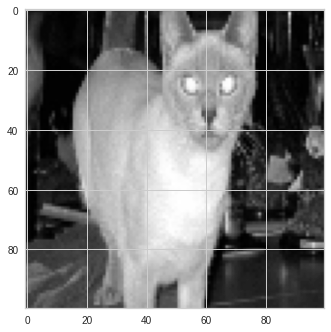

In [ ]:
#Above choosed test sample is used and image of that sample is displayed using matplotlib

import matplotlib.pyplot as plt
IMG_SIZE = 100
plt.imshow(x_test.reshape(x_test.shape[0], IMG_SIZE, IMG_SIZE)[test_sample], cmap ='gray')
plt.show()